# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
data_processor = DataProcessor( 
                             flux_values=X.to_numpy(),
                             wavelength_names=X.columns,
                             wavelength_values=wavelength_values,
                             output_values=y.to_numpy(),
                             output_names=output_names,
                             spectral_resolution=100,
                             trained_ML_model=None,
                             trained_ML_model_name='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
data_processor.split_train_validation_test(test_size=0.1, 
                                             val_size=0.1, 
                                             random_state_=42,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
data_processor.standardize_X_row_wise()

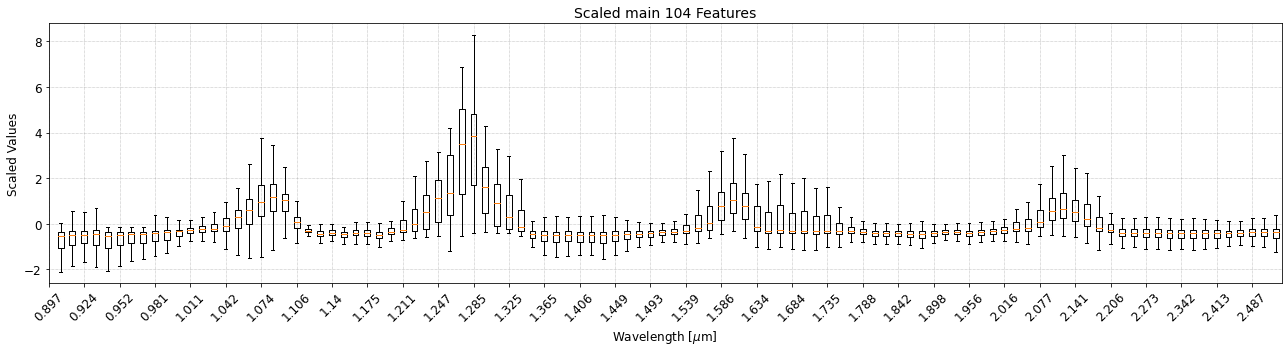

In [14]:
plot_boxplot(    
    data = data_processor.X_train_standardized_rowwise[:, ::-1],
    title='Scaled main 104 Features',
    xlabel='Wavelength [$\mu$m]',
    ylabel='Scaled Values',
    xticks_list=wavelength_names[::-1],
    fig_size=(18, 5),
            )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
data_processor.standardize_y_column_wise()

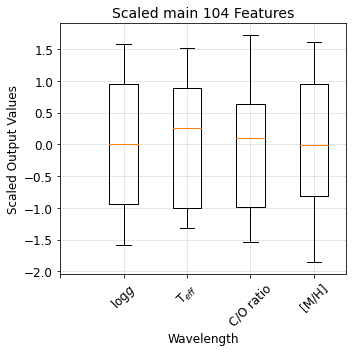

In [16]:
plot_boxplot(    
    data = data_processor.y_train_standardized_columnwise,
    title='Scaled main 104 Features',
    xlabel='Wavelength',
    ylabel='Scaled Output Values',
    xticks_list=['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
    fig_size=(5, 5),
            )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
data_processor.X_train_min = data_processor.X_train.min(axis=1)
data_processor.X_train_max = data_processor.X_train.max(axis=1)

# validation
data_processor.X_val_min = data_processor.X_val.min(axis=1)
data_processor.X_val_max = data_processor.X_val.max(axis=1)

# test
data_processor.X_test_min = data_processor.X_test.min(axis=1)
data_processor.X_test_max = data_processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((data_processor.X_train_min, data_processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((data_processor.X_val_min, data_processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((data_processor.X_test_min, data_processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_val.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_test.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,8.265340e-12,3.445259e-08
1,8.080712e-22,8.397132e-14
2,2.734403e-07,8.632182e-06
3,4.414951e-16,3.373262e-10
4,3.722576e-07,6.859888e-06


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
data_processor.standardize_X_column_wise(
                                        output_indicator='Trained_StandardScaler_X_ColWise_MinMax',
                                        X_train = df_MinMax_train.to_numpy(),
                                        X_val   = df_MinMax_val.to_numpy(),
                                        X_test  = df_MinMax_test.to_numpy(),
                                        )

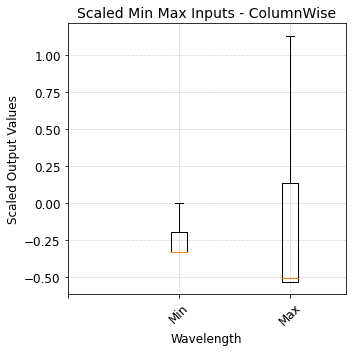

In [22]:
plot_boxplot(    
    data = data_processor.X_test_standardized_columnwise,
    title='Scaled Min Max Inputs - ColumnWise',
    xlabel='Wavelength',
    ylabel='Scaled Output Values',
    xticks_list= ['','Min','Max'],
    fig_size=(5, 5),
            )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

<img src="../figures/ML_model.jpg"
     alt="ML pipeline"
     style="float: left; margin-right: 10px; width: 90%;" />


In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = data_processor.X_train_standardized_rowwise,
            X1_val   = data_processor.X_val_standardized_rowwise,
            X1_test  = data_processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = data_processor.X_train_standardized_columnwise,
            X2_val   = data_processor.X_val_standardized_columnwise,
            X2_test  = data_processor.X_test_standardized_columnwise,


            # 1st target
            y1_train = data_processor.y_train_standardized_columnwise[:,0],
            y1_val   = data_processor.y_val_standardized_columnwise[:,0],
            y1_test  = data_processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = data_processor.y_train_standardized_columnwise[:,1],
            y2_val   = data_processor.y_val_standardized_columnwise[:,1],
            y2_test  = data_processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = data_processor.y_train_standardized_columnwise[:,2],
            y3_val   = data_processor.y_val_standardized_columnwise[:,2],
            y3_test  = data_processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = data_processor.y_train_standardized_columnwise[:,3],
            y4_val   = data_processor.y_val_standardized_columnwise[:,3],
            y4_test  = data_processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {
 'Conv__MaxPooling1D': 3,
 'Conv__NumberBlocks': 2,
 'Conv__NumberLayers': 3,
 'Conv__filters': 32,
 'Conv__kernel_size': 4,
 'FC1__NumberLayers': 3,
 'FC1__dropout': 0.0013358917126831819,
 'FC1__units': 256,
 'FC2__NumberBlocks': 1,
 'FC2__NumberLayers': 4,
 'FC2__dropout': 0.0018989744374361271,
 'FC2__units': 128,
 'lr': 0.00018890368162236508
 }

### 3.3.3 Build a CNN model

In [25]:
train_cnn_model.build_model(config=hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 32)              160       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 128)             16512     ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 288)             147744    ['Conv__B1_L2[0][0]']         


 Conv__B1__MaxPooling1D (Ma  (None, 34, 288)              0         ['Conv__B1_L3[0][0]']         


 xPooling1D)                                                                                      


 Conv__B2_L1 (Conv1D)        (None, 34, 128)              147584    ['Conv__B1__MaxPooling1D[0][0]


                                                                    ']                            


 Conv__B2_L2 (Conv1D)        (None, 34, 288)              147744    ['Conv__B2_L1[0][0]']         


 Conv__B2_L3 (Conv1D)        (None, 34, 512)              590336    ['Conv__B2_L2[0][0]']         


 Conv__B2__MaxPooling1D (Ma  (None, 11, 512)              0         ['Conv__B2_L3[0][0]']         


 xPooling1D)                                                                                      


 flatten (Flatten)           (None, 5632)                 0         ['Conv__B2__MaxPooling1D[0][0]


                                                                    ']                            


 FC1__B1_L1 (Dense)          (None, 256)                  1442048   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 1024)                 263168    ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 2304)                 2361600   ['FC1__B1_L2[0][0]']          


 FC1__B1_L3__Dropout (Dropo  (None, 2304)                 0         ['FC1__B1_L3[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 2306)                 0         ['FC1__B1_L3__Dropout[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 128)                  295296    ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 512)                  66048     ['FC2__B1_L1[0][0]']          


 FC2__B1_L3 (Dense)          (None, 1152)                 590976    ['FC2__B1_L2[0][0]']          


 FC2__B1_L4 (Dense)          (None, 2048)                 2361344   ['FC2__B1_L3[0][0]']          


 FC2__B1_L4__Dropout (Dropo  (None, 2048)                 0         ['FC2__B1_L4[0][0]']          


 ut)                                                                                              


 output__gravity (Dense)     (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__c_o_ratio (Dense)   (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__metallicity (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


 output__temperature (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


Total params: 8438756 (32.19 MB)


Trainable params: 8438756 (32.19 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [26]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=1000,
                                                budget=2)

Epoch 1/2


 1/26 [>.............................] - ETA: 1:26 - loss: 18.6822 - output__gravity_loss: 5.0275 - output__c_o_ratio_loss: 0.5836 - output__metallicity_loss: 5.7612 - output__temperature_loss: 7.3100 - output__gravity_mae: 5.5275 - output__c_o_ratio_mae: 0.9853 - output__metallicity_mae: 6.2612 - output__temperature_mae: 7.8100

 2/26 [=>............................] - ETA: 24s - loss: 12.4356 - output__gravity_loss: 3.0040 - output__c_o_ratio_loss: 0.7262 - output__metallicity_loss: 3.6509 - output__temperature_loss: 5.0545 - output__gravity_mae: 3.4722 - output__c_o_ratio_mae: 1.1416 - output__metallicity_mae: 4.1385 - output__temperature_mae: 5.5529 

 3/26 [==>...........................] - ETA: 22s - loss: 9.4919 - output__gravity_loss: 2.3040 - output__c_o_ratio_loss: 0.9222 - output__metallicity_loss: 2.7440 - output__temperature_loss: 3.5217 - output__gravity_mae: 2.7568 - output__c_o_ratio_mae: 1.3510 - output__metallicity_mae: 3.2119 - output__temperature_mae: 3.9898 

 4/26 [===>..........................] - ETA: 21s - loss: 7.9283 - output__gravity_loss: 1.8954 - output__c_o_ratio_loss: 0.8508 - output__metallicity_loss: 2.2893 - output__temperature_loss: 2.8928 - output__gravity_mae: 2.3351 - output__c_o_ratio_mae: 1.2734 - output__metallicity_mae: 2.7494 - output__temperature_mae: 3.3533

 5/26 [====>.........................] - ETA: 20s - loss: 6.8405 - output__gravity_loss: 1.6063 - output__c_o_ratio_loss: 0.7636 - output__metallicity_loss: 1.9011 - output__temperature_loss: 2.5696 - output__gravity_mae: 2.0372 - output__c_o_ratio_mae: 1.1801 - output__metallicity_mae: 2.3440 - output__temperature_mae: 3.0347

 6/26 [=====>........................] - ETA: 19s - loss: 6.0236 - output__gravity_loss: 1.4127 - output__c_o_ratio_loss: 0.7024 - output__metallicity_loss: 1.6590 - output__temperature_loss: 2.2496 - output__gravity_mae: 1.8369 - output__c_o_ratio_mae: 1.1142 - output__metallicity_mae: 2.0929 - output__temperature_mae: 2.7068

 7/26 [=======>......................] - ETA: 19s - loss: 5.3841 - output__gravity_loss: 1.2759 - output__c_o_ratio_loss: 0.6582 - output__metallicity_loss: 1.4750 - output__temperature_loss: 1.9750 - output__gravity_mae: 1.6963 - output__c_o_ratio_mae: 1.0671 - output__metallicity_mae: 1.8991 - output__temperature_mae: 2.4216

 8/26 [========>.....................] - ETA: 18s - loss: 4.9026 - output__gravity_loss: 1.1670 - output__c_o_ratio_loss: 0.6264 - output__metallicity_loss: 1.3408 - output__temperature_loss: 1.7685 - output__gravity_mae: 1.5836 - output__c_o_ratio_mae: 1.0329 - output__metallicity_mae: 1.7584 - output__temperature_mae: 2.2034

 9/26 [=========>....................] - ETA: 17s - loss: 4.5000 - output__gravity_loss: 1.0844 - output__c_o_ratio_loss: 0.5997 - output__metallicity_loss: 1.2288 - output__temperature_loss: 1.5871 - output__gravity_mae: 1.4987 - output__c_o_ratio_mae: 1.0040 - output__metallicity_mae: 1.6399 - output__temperature_mae: 2.0073

10/26 [==========>...................] - ETA: 16s - loss: 4.1711 - output__gravity_loss: 1.0164 - output__c_o_ratio_loss: 0.5759 - output__metallicity_loss: 1.1342 - output__temperature_loss: 1.4446 - output__gravity_mae: 1.4279 - output__c_o_ratio_mae: 0.9774 - output__metallicity_mae: 1.5388 - output__temperature_mae: 1.8547

11/26 [===========>..................] - ETA: 15s - loss: 3.8928 - output__gravity_loss: 0.9591 - output__c_o_ratio_loss: 0.5542 - output__metallicity_loss: 1.0608 - output__temperature_loss: 1.3186 - output__gravity_mae: 1.3679 - output__c_o_ratio_mae: 0.9525 - output__metallicity_mae: 1.4615 - output__temperature_mae: 1.7101

12/26 [============>.................] - ETA: 14s - loss: 3.6530 - output__gravity_loss: 0.9102 - output__c_o_ratio_loss: 0.5335 - output__metallicity_loss: 0.9940 - output__temperature_loss: 1.2153 - output__gravity_mae: 1.3166 - output__c_o_ratio_mae: 0.9287 - output__metallicity_mae: 1.3896 - output__temperature_mae: 1.5941

13/26 [==============>...............] - ETA: 13s - loss: 3.4511 - output__gravity_loss: 0.8675 - output__c_o_ratio_loss: 0.5129 - output__metallicity_loss: 0.9440 - output__temperature_loss: 1.1267 - output__gravity_mae: 1.2715 - output__c_o_ratio_mae: 0.9044 - output__metallicity_mae: 1.3373 - output__temperature_mae: 1.4936

14/26 [===============>..............] - ETA: 12s - loss: 3.2676 - output__gravity_loss: 0.8299 - output__c_o_ratio_loss: 0.4948 - output__metallicity_loss: 0.8930 - output__temperature_loss: 1.0500 - output__gravity_mae: 1.2310 - output__c_o_ratio_mae: 0.8827 - output__metallicity_mae: 1.2814 - output__temperature_mae: 1.4055

15/26 [================>.............] - ETA: 11s - loss: 3.1129 - output__gravity_loss: 0.7969 - output__c_o_ratio_loss: 0.4798 - output__metallicity_loss: 0.8527 - output__temperature_loss: 0.9835 - output__gravity_mae: 1.1952 - output__c_o_ratio_mae: 0.8644 - output__metallicity_mae: 1.2386 - output__temperature_mae: 1.3286

16/26 [=================>............] - ETA: 10s - loss: 2.9699 - output__gravity_loss: 0.7663 - output__c_o_ratio_loss: 0.4647 - output__metallicity_loss: 0.8132 - output__temperature_loss: 0.9256 - output__gravity_mae: 1.1616 - output__c_o_ratio_mae: 0.8456 - output__metallicity_mae: 1.1956 - output__temperature_mae: 1.2619

17/26 [==================>...........] - ETA: 9s - loss: 2.8456 - output__gravity_loss: 0.7401 - output__c_o_ratio_loss: 0.4514 - output__metallicity_loss: 0.7802 - output__temperature_loss: 0.8738 - output__gravity_mae: 1.1338 - output__c_o_ratio_mae: 0.8286 - output__metallicity_mae: 1.1591 - output__temperature_mae: 1.2020 

18/26 [===================>..........] - ETA: 8s - loss: 2.7319 - output__gravity_loss: 0.7154 - output__c_o_ratio_loss: 0.4380 - output__metallicity_loss: 0.7496 - output__temperature_loss: 0.8289 - output__gravity_mae: 1.1070 - output__c_o_ratio_mae: 0.8126 - output__metallicity_mae: 1.1255 - output__temperature_mae: 1.1513

19/26 [====================>.........] - ETA: 7s - loss: 2.6300 - output__gravity_loss: 0.6947 - output__c_o_ratio_loss: 0.4264 - output__metallicity_loss: 0.7211 - output__temperature_loss: 0.7878 - output__gravity_mae: 1.0846 - output__c_o_ratio_mae: 0.7982 - output__metallicity_mae: 1.0943 - output__temperature_mae: 1.1041

20/26 [======================>.......] - ETA: 6s - loss: 2.5369 - output__gravity_loss: 0.6757 - output__c_o_ratio_loss: 0.4152 - output__metallicity_loss: 0.6958 - output__temperature_loss: 0.7502 - output__gravity_mae: 1.0639 - output__c_o_ratio_mae: 0.7843 - output__metallicity_mae: 1.0667 - output__temperature_mae: 1.0597

21/26 [=======================>......] - ETA: 5s - loss: 2.4513 - output__gravity_loss: 0.6576 - output__c_o_ratio_loss: 0.4047 - output__metallicity_loss: 0.6718 - output__temperature_loss: 0.7173 - output__gravity_mae: 1.0443 - output__c_o_ratio_mae: 0.7709 - output__metallicity_mae: 1.0396 - output__temperature_mae: 1.0229

22/26 [========================>.....] - ETA: 4s - loss: 2.3715 - output__gravity_loss: 0.6411 - output__c_o_ratio_loss: 0.3943 - output__metallicity_loss: 0.6503 - output__temperature_loss: 0.6859 - output__gravity_mae: 1.0265 - output__c_o_ratio_mae: 0.7578 - output__metallicity_mae: 1.0162 - output__temperature_mae: 0.9842

23/26 [=========================>....] - ETA: 3s - loss: 2.2989 - output__gravity_loss: 0.6254 - output__c_o_ratio_loss: 0.3851 - output__metallicity_loss: 0.6298 - output__temperature_loss: 0.6585 - output__gravity_mae: 1.0091 - output__c_o_ratio_mae: 0.7467 - output__metallicity_mae: 0.9928 - output__temperature_mae: 0.9531

24/26 [==========================>...] - ETA: 2s - loss: 2.2310 - output__gravity_loss: 0.6110 - output__c_o_ratio_loss: 0.3759 - output__metallicity_loss: 0.6116 - output__temperature_loss: 0.6325 - output__gravity_mae: 0.9930 - output__c_o_ratio_mae: 0.7350 - output__metallicity_mae: 0.9727 - output__temperature_mae: 0.9215

25/26 [===========================>..] - ETA: 1s - loss: 2.1672 - output__gravity_loss: 0.5976 - output__c_o_ratio_loss: 0.3669 - output__metallicity_loss: 0.5940 - output__temperature_loss: 0.6086 - output__gravity_mae: 0.9780 - output__c_o_ratio_mae: 0.7238 - output__metallicity_mae: 0.9527 - output__temperature_mae: 0.8928

26/26 [==============================] - ETA: 0s - loss: 2.1660 - output__gravity_loss: 0.5974 - output__c_o_ratio_loss: 0.3667 - output__metallicity_loss: 0.5937 - output__temperature_loss: 0.6082 - output__gravity_mae: 0.9776 - output__c_o_ratio_mae: 0.7235 - output__metallicity_mae: 0.9523 - output__temperature_mae: 0.8923

26/26 [==============================] - 29s 1s/step - loss: 2.1660 - output__gravity_loss: 0.5974 - output__c_o_ratio_loss: 0.3667 - output__metallicity_loss: 0.5937 - output__temperature_loss: 0.6082 - output__gravity_mae: 0.9776 - output__c_o_ratio_mae: 0.7235 - output__metallicity_mae: 0.9523 - output__temperature_mae: 0.8923 - val_loss: 0.7617 - val_output__gravity_loss: 0.3644 - val_output__c_o_ratio_loss: 0.1931 - val_output__metallicity_loss: 0.1778 - val_output__temperature_loss: 0.0265 - val_output__gravity_mae: 0.7242 - val_output__c_o_ratio_mae: 0.5170 - val_output__metallicity_mae: 0.4843 - val_output__temperature_mae: 0.1804


Epoch 2/2


 1/26 [>.............................] - ETA: 25s - loss: 0.7535 - output__gravity_loss: 0.3501 - output__c_o_ratio_loss: 0.1913 - output__metallicity_loss: 0.1833 - output__temperature_loss: 0.0288 - output__gravity_mae: 0.7095 - output__c_o_ratio_mae: 0.5174 - output__metallicity_mae: 0.4960 - output__temperature_mae: 0.1868

 2/26 [=>............................] - ETA: 24s - loss: 0.7252 - output__gravity_loss: 0.3026 - output__c_o_ratio_loss: 0.2083 - output__metallicity_loss: 0.1857 - output__temperature_loss: 0.0286 - output__gravity_mae: 0.6512 - output__c_o_ratio_mae: 0.5239 - output__metallicity_mae: 0.4992 - output__temperature_mae: 0.1886

 3/26 [==>...........................] - ETA: 23s - loss: 0.6946 - output__gravity_loss: 0.2983 - output__c_o_ratio_loss: 0.1832 - output__metallicity_loss: 0.1857 - output__temperature_loss: 0.0274 - output__gravity_mae: 0.6485 - output__c_o_ratio_mae: 0.4871 - output__metallicity_mae: 0.4959 - output__temperature_mae: 0.1820

 4/26 [===>..........................] - ETA: 22s - loss: 0.6889 - output__gravity_loss: 0.2900 - output__c_o_ratio_loss: 0.1831 - output__metallicity_loss: 0.1900 - output__temperature_loss: 0.0258 - output__gravity_mae: 0.6404 - output__c_o_ratio_mae: 0.4904 - output__metallicity_mae: 0.4997 - output__temperature_mae: 0.1752

 5/26 [====>.........................] - ETA: 21s - loss: 0.6711 - output__gravity_loss: 0.2810 - output__c_o_ratio_loss: 0.1805 - output__metallicity_loss: 0.1847 - output__temperature_loss: 0.0248 - output__gravity_mae: 0.6272 - output__c_o_ratio_mae: 0.4830 - output__metallicity_mae: 0.4924 - output__temperature_mae: 0.1701

 6/26 [=====>........................] - ETA: 20s - loss: 0.6580 - output__gravity_loss: 0.2764 - output__c_o_ratio_loss: 0.1743 - output__metallicity_loss: 0.1832 - output__temperature_loss: 0.0241 - output__gravity_mae: 0.6208 - output__c_o_ratio_mae: 0.4718 - output__metallicity_mae: 0.4920 - output__temperature_mae: 0.1666

 7/26 [=======>......................] - ETA: 19s - loss: 0.6551 - output__gravity_loss: 0.2728 - output__c_o_ratio_loss: 0.1772 - output__metallicity_loss: 0.1815 - output__temperature_loss: 0.0237 - output__gravity_mae: 0.6159 - output__c_o_ratio_mae: 0.4784 - output__metallicity_mae: 0.4894 - output__temperature_mae: 0.1647

 8/26 [========>.....................] - ETA: 18s - loss: 0.6414 - output__gravity_loss: 0.2684 - output__c_o_ratio_loss: 0.1695 - output__metallicity_loss: 0.1797 - output__temperature_loss: 0.0238 - output__gravity_mae: 0.6109 - output__c_o_ratio_mae: 0.4656 - output__metallicity_mae: 0.4855 - output__temperature_mae: 0.1650

 9/26 [=========>....................] - ETA: 17s - loss: 0.6370 - output__gravity_loss: 0.2658 - output__c_o_ratio_loss: 0.1681 - output__metallicity_loss: 0.1799 - output__temperature_loss: 0.0232 - output__gravity_mae: 0.6084 - output__c_o_ratio_mae: 0.4614 - output__metallicity_mae: 0.4848 - output__temperature_mae: 0.1633

10/26 [==========>...................] - ETA: 16s - loss: 0.6275 - output__gravity_loss: 0.2637 - output__c_o_ratio_loss: 0.1634 - output__metallicity_loss: 0.1773 - output__temperature_loss: 0.0231 - output__gravity_mae: 0.6045 - output__c_o_ratio_mae: 0.4543 - output__metallicity_mae: 0.4816 - output__temperature_mae: 0.1631

11/26 [===========>..................] - ETA: 15s - loss: 0.6222 - output__gravity_loss: 0.2609 - output__c_o_ratio_loss: 0.1620 - output__metallicity_loss: 0.1762 - output__temperature_loss: 0.0232 - output__gravity_mae: 0.6012 - output__c_o_ratio_mae: 0.4538 - output__metallicity_mae: 0.4804 - output__temperature_mae: 0.1635

12/26 [============>.................] - ETA: 14s - loss: 0.6146 - output__gravity_loss: 0.2576 - output__c_o_ratio_loss: 0.1584 - output__metallicity_loss: 0.1756 - output__temperature_loss: 0.0230 - output__gravity_mae: 0.5975 - output__c_o_ratio_mae: 0.4479 - output__metallicity_mae: 0.4805 - output__temperature_mae: 0.1622

13/26 [==============>...............] - ETA: 13s - loss: 0.6064 - output__gravity_loss: 0.2540 - output__c_o_ratio_loss: 0.1555 - output__metallicity_loss: 0.1743 - output__temperature_loss: 0.0226 - output__gravity_mae: 0.5922 - output__c_o_ratio_mae: 0.4430 - output__metallicity_mae: 0.4781 - output__temperature_mae: 0.1614

14/26 [===============>..............] - ETA: 12s - loss: 0.5995 - output__gravity_loss: 0.2516 - output__c_o_ratio_loss: 0.1530 - output__metallicity_loss: 0.1726 - output__temperature_loss: 0.0223 - output__gravity_mae: 0.5891 - output__c_o_ratio_mae: 0.4399 - output__metallicity_mae: 0.4748 - output__temperature_mae: 0.1607

15/26 [================>.............] - ETA: 11s - loss: 0.5895 - output__gravity_loss: 0.2484 - output__c_o_ratio_loss: 0.1483 - output__metallicity_loss: 0.1709 - output__temperature_loss: 0.0219 - output__gravity_mae: 0.5846 - output__c_o_ratio_mae: 0.4318 - output__metallicity_mae: 0.4721 - output__temperature_mae: 0.1593

16/26 [=================>............] - ETA: 10s - loss: 0.5833 - output__gravity_loss: 0.2457 - output__c_o_ratio_loss: 0.1459 - output__metallicity_loss: 0.1701 - output__temperature_loss: 0.0217 - output__gravity_mae: 0.5812 - output__c_o_ratio_mae: 0.4271 - output__metallicity_mae: 0.4711 - output__temperature_mae: 0.1582

17/26 [==================>...........] - ETA: 9s - loss: 0.5769 - output__gravity_loss: 0.2440 - output__c_o_ratio_loss: 0.1428 - output__metallicity_loss: 0.1687 - output__temperature_loss: 0.0215 - output__gravity_mae: 0.5783 - output__c_o_ratio_mae: 0.4222 - output__metallicity_mae: 0.4688 - output__temperature_mae: 0.1571 

18/26 [===================>..........] - ETA: 8s - loss: 0.5686 - output__gravity_loss: 0.2411 - output__c_o_ratio_loss: 0.1394 - output__metallicity_loss: 0.1669 - output__temperature_loss: 0.0212 - output__gravity_mae: 0.5745 - output__c_o_ratio_mae: 0.4167 - output__metallicity_mae: 0.4657 - output__temperature_mae: 0.1560

19/26 [====================>.........] - ETA: 7s - loss: 0.5617 - output__gravity_loss: 0.2385 - output__c_o_ratio_loss: 0.1366 - output__metallicity_loss: 0.1654 - output__temperature_loss: 0.0212 - output__gravity_mae: 0.5705 - output__c_o_ratio_mae: 0.4115 - output__metallicity_mae: 0.4636 - output__temperature_mae: 0.1564

20/26 [======================>.......] - ETA: 6s - loss: 0.5539 - output__gravity_loss: 0.2352 - output__c_o_ratio_loss: 0.1335 - output__metallicity_loss: 0.1642 - output__temperature_loss: 0.0210 - output__gravity_mae: 0.5658 - output__c_o_ratio_mae: 0.4061 - output__metallicity_mae: 0.4618 - output__temperature_mae: 0.1552

21/26 [=======================>......] - ETA: 5s - loss: 0.5468 - output__gravity_loss: 0.2321 - output__c_o_ratio_loss: 0.1312 - output__metallicity_loss: 0.1627 - output__temperature_loss: 0.0208 - output__gravity_mae: 0.5615 - output__c_o_ratio_mae: 0.4025 - output__metallicity_mae: 0.4594 - output__temperature_mae: 0.1543

22/26 [========================>.....] - ETA: 4s - loss: 0.5398 - output__gravity_loss: 0.2287 - output__c_o_ratio_loss: 0.1288 - output__metallicity_loss: 0.1617 - output__temperature_loss: 0.0206 - output__gravity_mae: 0.5561 - output__c_o_ratio_mae: 0.3978 - output__metallicity_mae: 0.4577 - output__temperature_mae: 0.1534

23/26 [=========================>....] - ETA: 3s - loss: 0.5324 - output__gravity_loss: 0.2257 - output__c_o_ratio_loss: 0.1261 - output__metallicity_loss: 0.1603 - output__temperature_loss: 0.0203 - output__gravity_mae: 0.5517 - output__c_o_ratio_mae: 0.3932 - output__metallicity_mae: 0.4557 - output__temperature_mae: 0.1522

24/26 [==========================>...] - ETA: 2s - loss: 0.5272 - output__gravity_loss: 0.2240 - output__c_o_ratio_loss: 0.1236 - output__metallicity_loss: 0.1595 - output__temperature_loss: 0.0202 - output__gravity_mae: 0.5488 - output__c_o_ratio_mae: 0.3887 - output__metallicity_mae: 0.4544 - output__temperature_mae: 0.1519

25/26 [===========================>..] - ETA: 1s - loss: 0.5219 - output__gravity_loss: 0.2231 - output__c_o_ratio_loss: 0.1212 - output__metallicity_loss: 0.1577 - output__temperature_loss: 0.0199 - output__gravity_mae: 0.5482 - output__c_o_ratio_mae: 0.3843 - output__metallicity_mae: 0.4516 - output__temperature_mae: 0.1509

26/26 [==============================] - ETA: 0s - loss: 0.5219 - output__gravity_loss: 0.2231 - output__c_o_ratio_loss: 0.1211 - output__metallicity_loss: 0.1577 - output__temperature_loss: 0.0199 - output__gravity_mae: 0.5483 - output__c_o_ratio_mae: 0.3842 - output__metallicity_mae: 0.4516 - output__temperature_mae: 0.1509

26/26 [==============================] - 28s 1s/step - loss: 0.5219 - output__gravity_loss: 0.2231 - output__c_o_ratio_loss: 0.1211 - output__metallicity_loss: 0.1577 - output__temperature_loss: 0.0199 - output__gravity_mae: 0.5483 - output__c_o_ratio_mae: 0.3842 - output__metallicity_mae: 0.4516 - output__temperature_mae: 0.1509 - val_loss: 0.7936 - val_output__gravity_loss: 0.4762 - val_output__c_o_ratio_loss: 0.1578 - val_output__metallicity_loss: 0.1403 - val_output__temperature_loss: 0.0192 - val_output__gravity_mae: 0.8995 - val_output__c_o_ratio_mae: 0.4742 - val_output__metallicity_mae: 0.4172 - val_output__temperature_mae: 0.1534


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [27]:
history, model

(<keras.src.callbacks.History at 0x7fa14bdaeb20>,
 <keras.src.engine.functional.Functional at 0x7fa16a5ba040>)

In [28]:
history

In [29]:
data_processor.trained_ML_model = model
data_processor.history = history

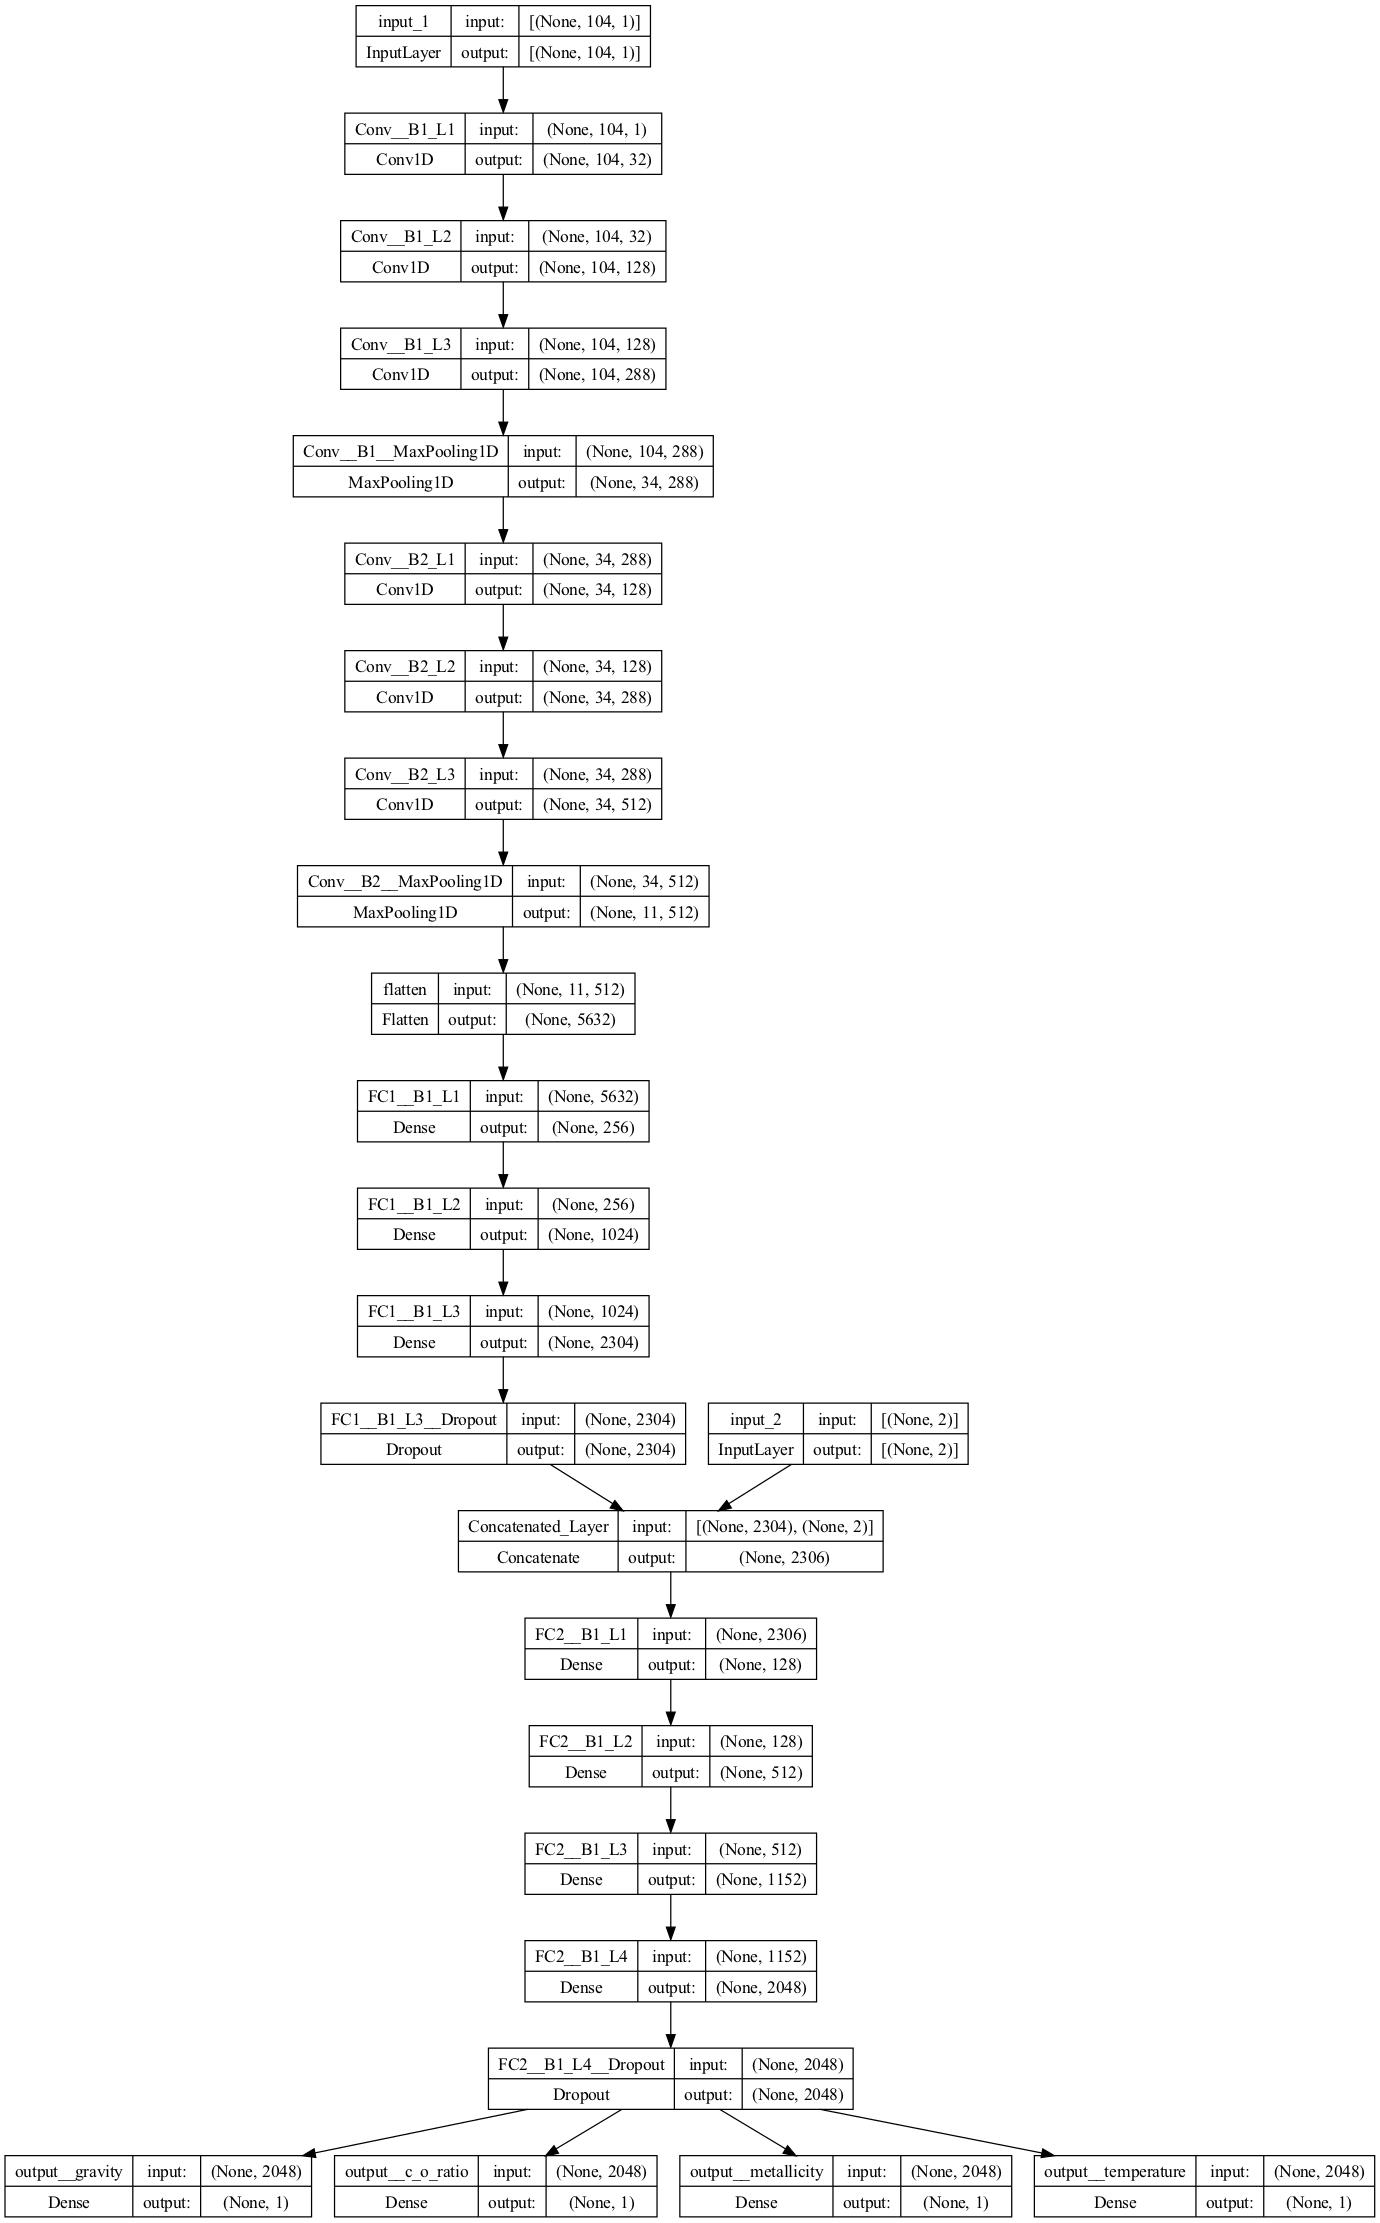

In [30]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

### 3.3.6 Trained Model Outcomes

In [31]:
load_or_dump_trained_model_CNN( trained_model = data_processor,
                                                        output_indicator='tuned_bohb_batch32_v3_1000epoch_out10_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [32]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='tuned_bohb_batch32_v3_1000epoch_out10_test',
                                                      load_or_dump = 'load')

In [33]:
train_cnn_model.trained_model = loaded_model
train_cnn_model.trained_model_history = history

In [34]:
# history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

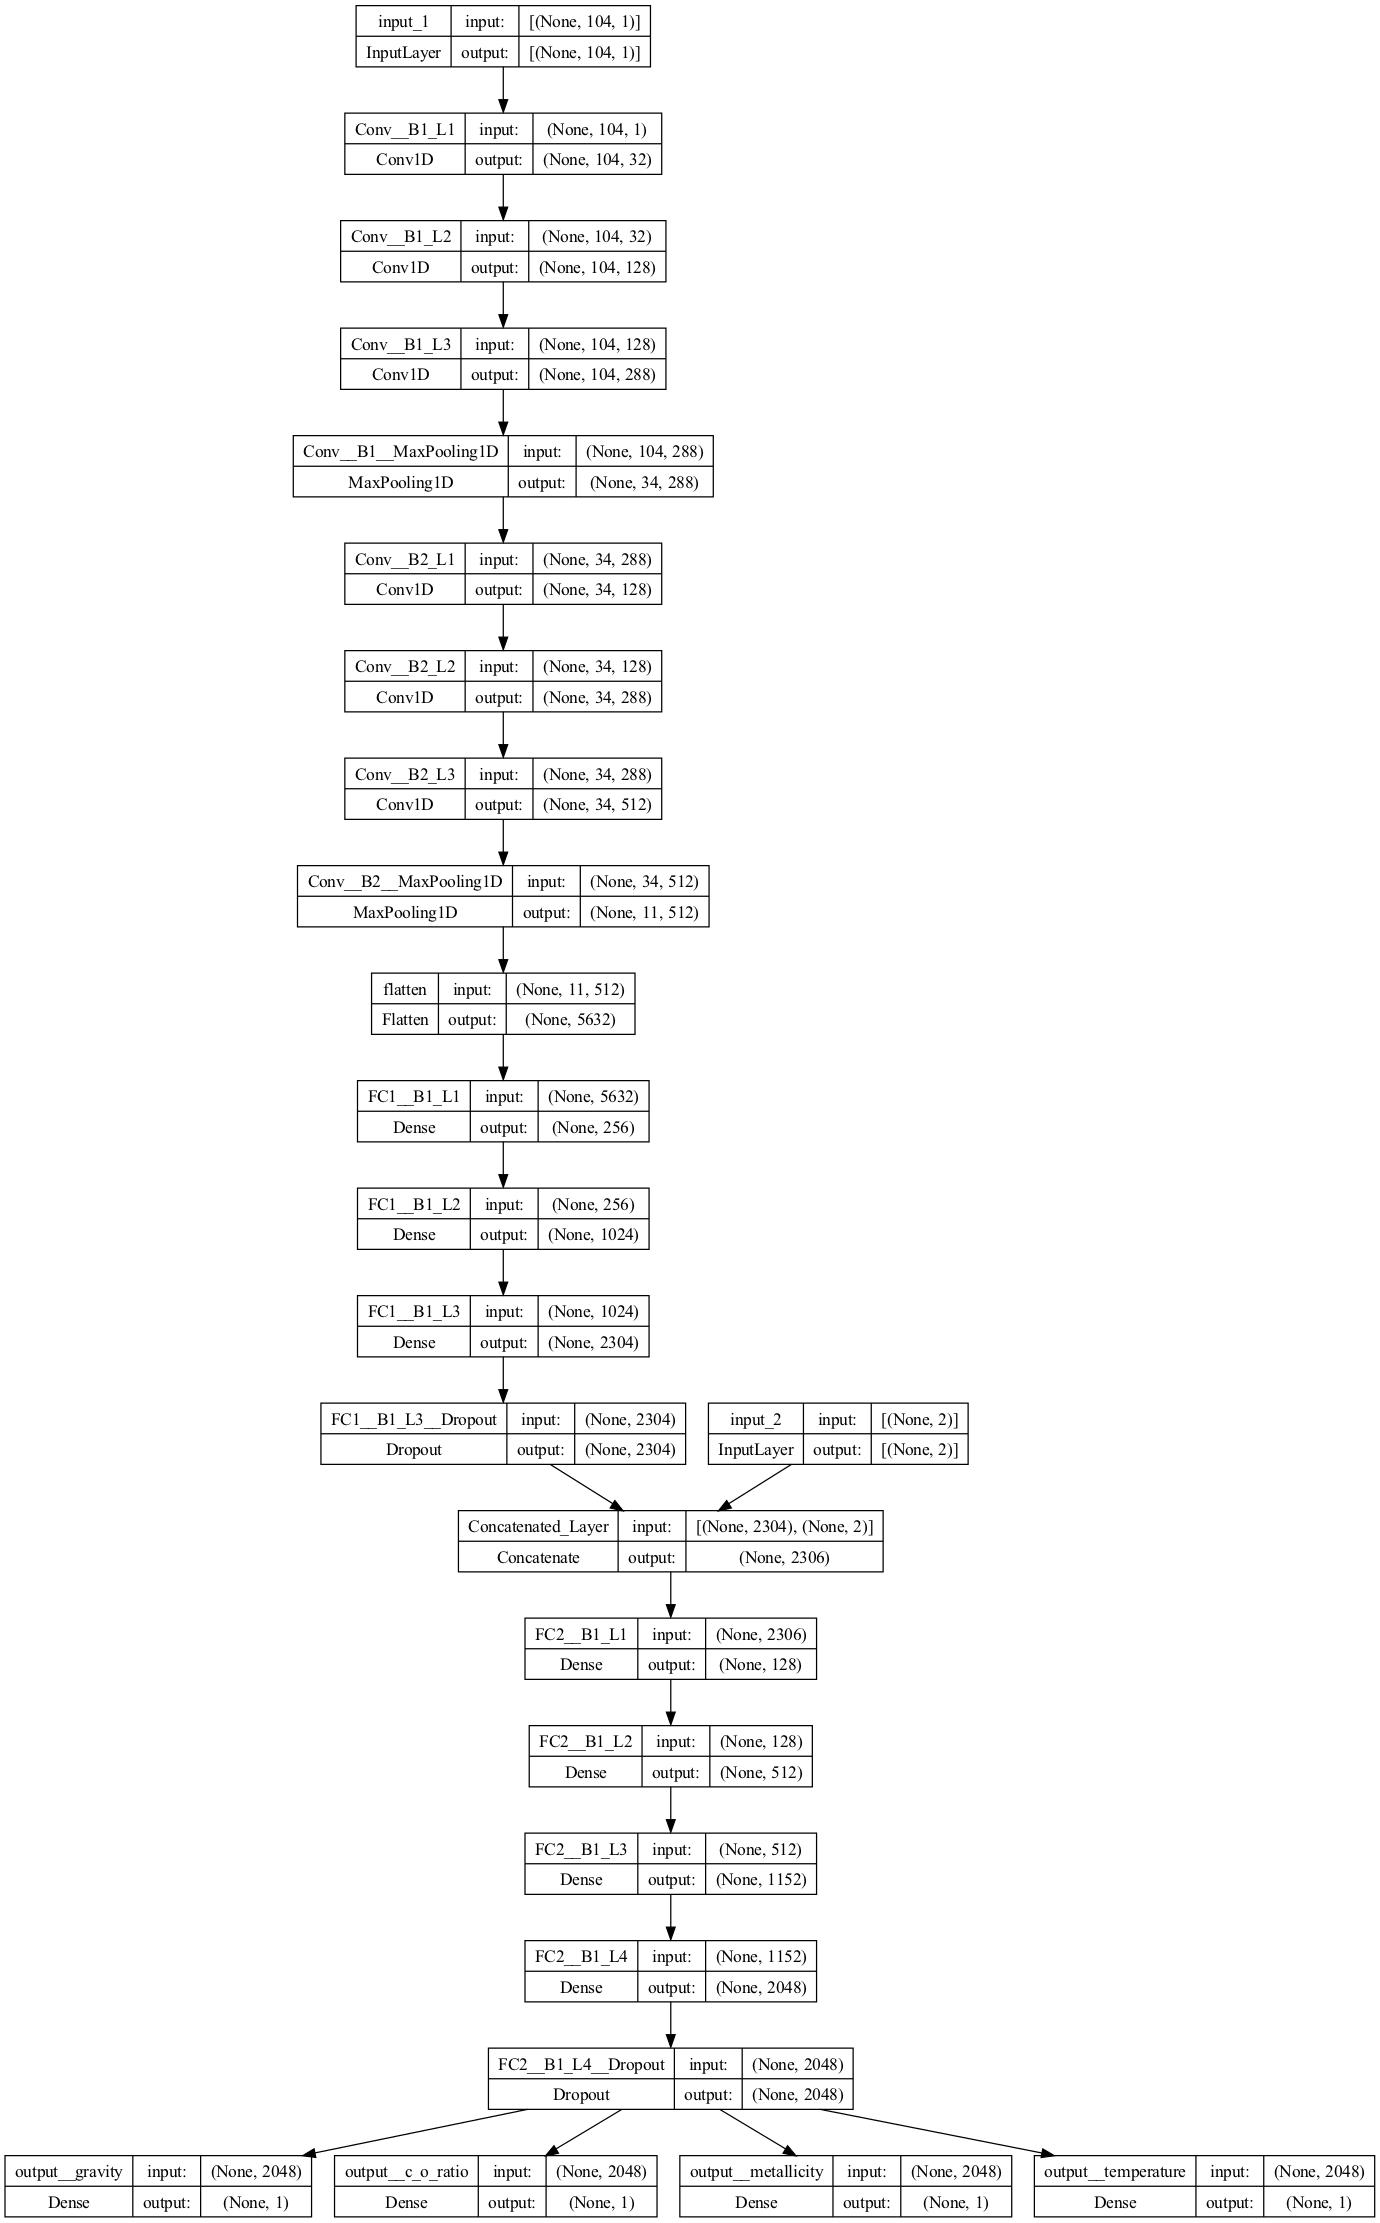

In [35]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

In [36]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 32)              160       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 128)             16512     ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 288)             147744    ['Conv__B1_L2[0][0]']         


 Conv__B1__MaxPooling1D (Ma  (None, 34, 288)              0         ['Conv__B1_L3[0][0]']         


 xPooling1D)                                                                                      


 Conv__B2_L1 (Conv1D)        (None, 34, 128)              147584    ['Conv__B1__MaxPooling1D[0][0]


                                                                    ']                            


 Conv__B2_L2 (Conv1D)        (None, 34, 288)              147744    ['Conv__B2_L1[0][0]']         


 Conv__B2_L3 (Conv1D)        (None, 34, 512)              590336    ['Conv__B2_L2[0][0]']         


 Conv__B2__MaxPooling1D (Ma  (None, 11, 512)              0         ['Conv__B2_L3[0][0]']         


 xPooling1D)                                                                                      


 flatten (Flatten)           (None, 5632)                 0         ['Conv__B2__MaxPooling1D[0][0]


                                                                    ']                            


 FC1__B1_L1 (Dense)          (None, 256)                  1442048   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 1024)                 263168    ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 2304)                 2361600   ['FC1__B1_L2[0][0]']          


 FC1__B1_L3__Dropout (Dropo  (None, 2304)                 0         ['FC1__B1_L3[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 2306)                 0         ['FC1__B1_L3__Dropout[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 128)                  295296    ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 512)                  66048     ['FC2__B1_L1[0][0]']          


 FC2__B1_L3 (Dense)          (None, 1152)                 590976    ['FC2__B1_L2[0][0]']          


 FC2__B1_L4 (Dense)          (None, 2048)                 2361344   ['FC2__B1_L3[0][0]']          


 FC2__B1_L4__Dropout (Dropo  (None, 2048)                 0         ['FC2__B1_L4[0][0]']          


 ut)                                                                                              


 output__gravity (Dense)     (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__c_o_ratio (Dense)   (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__metallicity (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


 output__temperature (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


Total params: 8438756 (32.19 MB)


Trainable params: 8438756 (32.19 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


In [37]:
# history.history

### 3.4.3  Check the training history through *Loss* metric

In [38]:
# train_cnn_model.trained_model_history
plot_ML_model_loss(trained_ML_model_history = train_cnn_model.trained_model_history,
                title = 'Hyperparameter-Tuned CNN model')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [39]:
train_cnn_model

  1/131 [..............................] - ETA: 26s

  3/131 [..............................] - ETA: 5s 

  5/131 [>.............................] - ETA: 5s

  7/131 [>.............................] - ETA: 4s

  9/131 [=>............................] - ETA: 4s

 11/131 [=>............................] - ETA: 4s

 13/131 [=>............................] - ETA: 4s

 15/131 [==>...........................] - ETA: 4s

 17/131 [==>...........................] - ETA: 4s

 19/131 [===>..........................] - ETA: 4s

 21/131 [===>..........................] - ETA: 4s

 23/131 [====>.........................] - ETA: 4s

 25/131 [====>.........................] - ETA: 4s

 27/131 [=====>........................] - ETA: 4s

 29/131 [=====>........................] - ETA: 4s

 31/131 [======>.......................] - ETA: 3s

 33/131 [======>.......................] - ETA: 3s

 35/131 [=======>......................] - ETA: 3s

 37/131 [=======>......................] - ETA: 3s

 39/131 [=======>......................] - ETA: 3s

 41/131 [========>.....................] - ETA: 3s

 43/131 [========>.....................] - ETA: 3s

 45/131 [=========>....................] - ETA: 3s

 47/131 [=========>....................] - ETA: 3s

 49/131 [==========>...................] - ETA: 3s

 51/131 [==========>...................] - ETA: 3s

 53/131 [===========>..................] - ETA: 2s

 55/131 [===========>..................] - ETA: 2s

 57/131 [============>.................] - ETA: 2s

 59/131 [============>.................] - ETA: 2s

 61/131 [============>.................] - ETA: 2s

 63/131 [=============>................] - ETA: 2s

 65/131 [=============>................] - ETA: 2s

 67/131 [==============>...............] - ETA: 2s

 69/131 [==============>...............] - ETA: 2s

 70/131 [===============>..............] - ETA: 2s

 72/131 [===============>..............] - ETA: 2s

 74/131 [===============>..............] - ETA: 2s

 76/131 [================>.............] - ETA: 2s

 78/131 [================>.............] - ETA: 2s

 80/131 [=================>............] - ETA: 1s

 82/131 [=================>............] - ETA: 1s

 84/131 [==================>...........] - ETA: 1s

 86/131 [==================>...........] - ETA: 1s

 88/131 [===================>..........] - ETA: 1s

 90/131 [===================>..........] - ETA: 1s

 92/131 [====================>.........] - ETA: 1s

 94/131 [====================>.........] - ETA: 1s

 96/131 [====================>.........] - ETA: 1s

 98/131 [=====================>........] - ETA: 1s

100/131 [=====================>........] - ETA: 1s

102/131 [======================>.......] - ETA: 1s

104/131 [======================>.......] - ETA: 1s

106/131 [=======================>......] - ETA: 0s

108/131 [=======================>......] - ETA: 0s

110/131 [========================>.....] - ETA: 0s

112/131 [========================>.....] - ETA: 0s

114/131 [=========================>....] - ETA: 0s

116/131 [=========================>....] - ETA: 0s

118/131 [==========================>...] - ETA: 0s

120/131 [==========================>...] - ETA: 0s

122/131 [==========================>...] - ETA: 0s

124/131 [===========================>..] - ETA: 0s

126/131 [===========================>..] - ETA: 0s

128/131 [============================>.] - ETA: 0s

130/131 [============================>.] - ETA: 0s

131/131 [==============================] - 5s 38ms/step


 1/17 [>.............................] - ETA: 0s

 3/17 [====>.........................] - ETA: 0s

 5/17 [=======>......................] - ETA: 0s

 7/17 [===========>..................] - ETA: 0s

 9/17 [==============>...............] - ETA: 0s

11/17 [==================>...........] - ETA: 0s

13/17 [=====================>........] - ETA: 0s

15/17 [=========================>....] - ETA: 0s

17/17 [==============================] - ETA: 0s

17/17 [==============================] - 1s 35ms/step


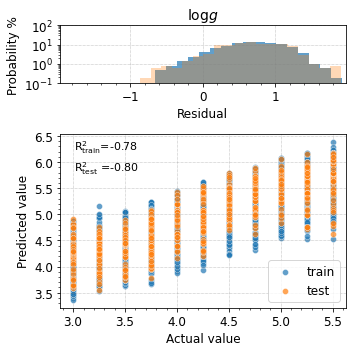

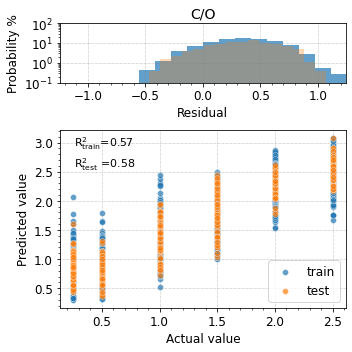

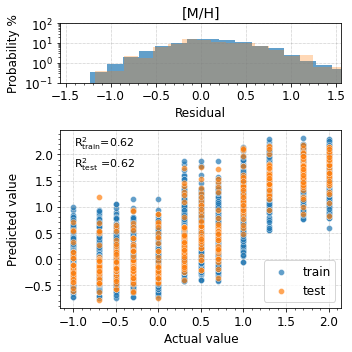

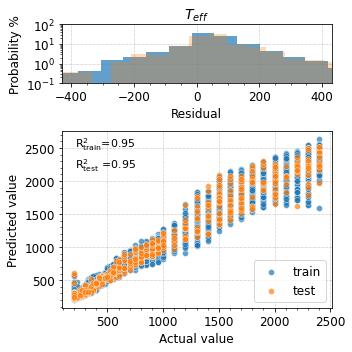

In [40]:
i = 6
plot_regression_report(
        trained_ML_model = train_cnn_model.trained_model,
        trained_DataProcessor = data_processor,
        Xtrain = [data_processor.X_train_standardized_rowwise[::i],
                  data_processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [data_processor.X_test_standardized_rowwise[::i], 
                  data_processor.X_test_standardized_columnwise[::i]],
    
        ytrain = data_processor.y_train_standardized_columnwise[::i],
    
        ytest  = data_processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
        __print_results__ = False,       
        __save_plots__ = False
                 )